In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download(['punkt', 'wordnet', 'stopwords'])

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/thiagomacedo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/thiagomacedo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/thiagomacedo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
df = pd.read_csv('tweets.csv')
df.head()

,author_id,created_at,id,lang,retweet_count,text,sinal
0,"1,46E+18",2022-08-08T01:08:23Z,"1,56E+18",pt,45,RT @EdegarPretto O meu candidato vice-governad...,1.0
1,"1,51E+18",2022-08-08T01:08:23Z,"1,56E+18",pt,0,Periga o Argenta chamar o Simon pra responder ...,NaN
2,"1,06E+18",2022-08-08T01:08:21Z,"1,56E+18",pt,14,RT @WinstonLing Segue o link para assistirem o...,1.0
3,"7,15E+17",2022-08-08T01:08:20Z,"1,56E+18",pt,88,RT @EdegarPretto Eu quero dizer aos gaúchos e ...,NaN
4,1455004730,2022-08-08T01:08:20Z,"1,56E+18",pt,0,@wmfigueiredo @evertonvf @bandrs @EduardoLeite...,0.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   author_id      3000 non-null   object 
 1   created_at     3000 non-null   object 
 2   id             3000 non-null   object 
 3   lang           3000 non-null   object 
 4   retweet_count  3000 non-null   int64  
 5   text           3000 non-null   object 
 6   sinal          1236 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 164.2+ KB


In [29]:
df = df[['text', 'sinal']]
df.head()

,text,sinal
0,RT @EdegarPretto O meu candidato vice-governad...,1.0
1,Periga o Argenta chamar o Simon pra responder ...,NaN
2,RT @WinstonLing Segue o link para assistirem o...,1.0
3,RT @EdegarPretto Eu quero dizer aos gaúchos e ...,NaN
4,@wmfigueiredo @evertonvf @bandrs @EduardoLeite...,0.0


In [30]:
df = df.dropna(axis=0)
df.head()

,text,sinal
0,RT @EdegarPretto O meu candidato vice-governad...,1.0
2,RT @WinstonLing Segue o link para assistirem o...,1.0
4,@wmfigueiredo @evertonvf @bandrs @EduardoLeite...,0.0
5,@EduardoLeite_ 🤡,0.0
6,Nós já governamos o Rio Grande Sul com @olivio...,0.0


In [31]:
df.sinal = df.sinal.astype('int64')
df.head()

,text,sinal
0,RT @EdegarPretto O meu candidato vice-governad...,1
2,RT @WinstonLing Segue o link para assistirem o...,1
4,@wmfigueiredo @evertonvf @bandrs @EduardoLeite...,0
5,@EduardoLeite_ 🤡,0
6,Nós já governamos o Rio Grande Sul com @olivio...,0


In [32]:
df.shape

(1236, 2)

In [33]:
df.duplicated().sum()

250

In [34]:
df = df.drop_duplicates()
df.head()

,text,sinal
0,RT @EdegarPretto O meu candidato vice-governad...,1
2,RT @WinstonLing Segue o link para assistirem o...,1
4,@wmfigueiredo @evertonvf @bandrs @EduardoLeite...,0
5,@EduardoLeite_ 🤡,0
6,Nós já governamos o Rio Grande Sul com @olivio...,0


In [35]:
df.shape

(986, 2)

In [36]:
df = df.reset_index(drop=True)
df.head()

,text,sinal
0,RT @EdegarPretto O meu candidato vice-governad...,1
1,RT @WinstonLing Segue o link para assistirem o...,1
2,@wmfigueiredo @evertonvf @bandrs @EduardoLeite...,0
3,@EduardoLeite_ 🤡,0
4,Nós já governamos o Rio Grande Sul com @olivio...,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    986 non-null    object
 1   sinal   986 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 15.5+ KB


In [38]:
df = df.rename(columns={'text':'tweet', 'sinal':'positive'})
df.head()

,tweet,positive
0,RT @EdegarPretto O meu candidato vice-governad...,1
1,RT @WinstonLing Segue o link para assistirem o...,1
2,@wmfigueiredo @evertonvf @bandrs @EduardoLeite...,0
3,@EduardoLeite_ 🤡,0
4,Nós já governamos o Rio Grande Sul com @olivio...,0


In [39]:
X = df['tweet']
y = df['positive']

In [40]:
df.groupby('positive')['tweet'].count()

positive
0    605
1    381
Name: tweet, dtype: int64

In [41]:
df_p = df.loc[df.positive == 1].iloc[:354]
df_n = df.loc[df.positive == 0]
dft = pd.concat([df_p, df_n])

In [42]:
X = dft['tweet']
y = dft['positive']

In [43]:
def tokenize(text):
    # make all text lowercase 
    text = text.lower()

    # remove all type of punctuations 
    text = re.sub(f'[^a-z0-9]',' ', text)

    # tokenize the text
    tokens = word_tokenize(text)

    # lemmatize the text
    tokens = [WordNetLemmatizer().lemmatize(w) for w in tokens]

    # remove stopwords
    tokens = [w for w in tokens if w not in stopwords.words('portuguese')]
    
    return tokens

pipeline_rf = Pipeline([
    ('vect', CountVectorizer(tokenizer=tokenize)),
    ('tfidf', TfidfTransformer()),
    ('moc', RandomForestClassifier())
])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [45]:
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(tokenizer=<function tokenize at 0x7f8edb805550>)),
                ('tfidf', TfidfTransformer()),
                ('moc', RandomForestClassifier())])

In [46]:
y_pred = pipeline_rf.predict(X_test)

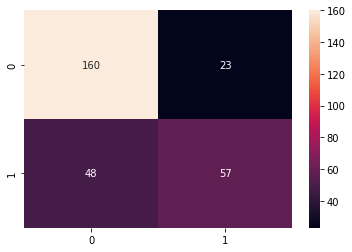

In [47]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f")
plt.show()

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       183
           1       0.71      0.54      0.62       105

    accuracy                           0.75       288
   macro avg       0.74      0.71      0.72       288
weighted avg       0.75      0.75      0.74       288



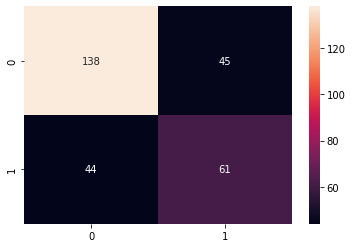

              precision    recall  f1-score   support

           0       0.76      0.75      0.76       183
           1       0.58      0.58      0.58       105

    accuracy                           0.69       288
   macro avg       0.67      0.67      0.67       288
weighted avg       0.69      0.69      0.69       288



In [49]:
from xgboost import XGBClassifier
pipeline_xg = Pipeline([
    ('vect', CountVectorizer(tokenizer=tokenize)),
    ('tfidf', TfidfTransformer()),
    ('moc', XGBClassifier())
])
pipeline_xg.fit(X_train, y_train)
y_pred = pipeline_xg.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f")
plt.show()
print(classification_report(y_test, y_pred))

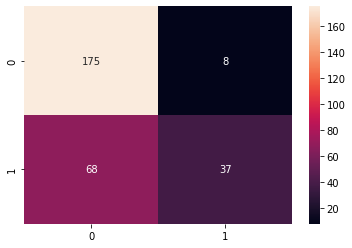

              precision    recall  f1-score   support

           0       0.72      0.96      0.82       183
           1       0.82      0.35      0.49       105

    accuracy                           0.74       288
   macro avg       0.77      0.65      0.66       288
weighted avg       0.76      0.74      0.70       288



In [50]:
pipeline_nb = Pipeline([
    ('vect', CountVectorizer(tokenizer=tokenize)),
    ('tfidf', TfidfTransformer()),
    ('moc', MultinomialNB())
])
pipeline_nb.fit(X_train, y_train)
y_pred = pipeline_nb.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f")
plt.show()
print(classification_report(y_test, y_pred))

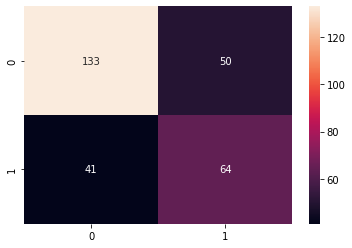

              precision    recall  f1-score   support

           0       0.76      0.73      0.75       183
           1       0.56      0.61      0.58       105

    accuracy                           0.68       288
   macro avg       0.66      0.67      0.66       288
weighted avg       0.69      0.68      0.69       288



In [51]:
pipeline_ad = Pipeline([
        ('vect', CountVectorizer(tokenizer=tokenize)),
        ('tfidf', TfidfTransformer()),
        ('moc', AdaBoostClassifier())
    ])
pipeline_ad.fit(X_train, y_train)
y_pred = pipeline_ad.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f")
plt.show()
print(classification_report(y_test, y_pred))
